# Airlines Performance Showcase
## by Mostafa As'ad

## Investigation Overview

Showcase flights frequency per Airline
Showcase the effect of delays on flight rate
Showcase the effect of cancellation rate on flight rate.
Taxiing comparison between the different airlines.
Investigating the impact of location (i.e. city) on flight rate per Airline.

## Dataset Overview

This database contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Setting base color for seaborn plots
base_color = sns.color_palette()[0];


# Setting axes title and label
def axes_labels(title, xlabel, ylabel):
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    
def axes_size(width, length):
    plt.gcf().set_size_inches((width, length));

In [12]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv("flights.csv")

## Flights Count

This data shows how different airlines provide different flight rate, with WN as the top Airline with the largest number of flights, and HA as the least.

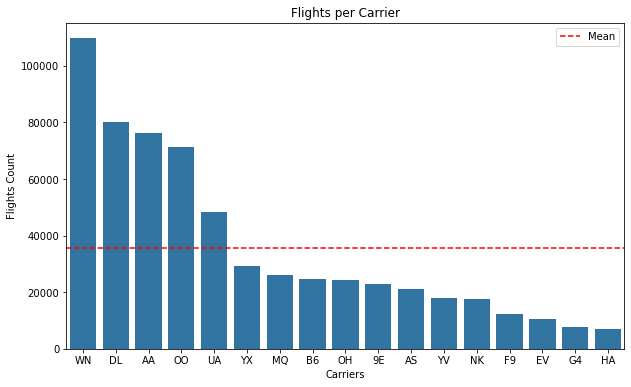

In [26]:
carriers_order = flights['OP_UNIQUE_CARRIER'].value_counts().index;
sns.countplot(data = flights, x="OP_UNIQUE_CARRIER", order=carriers_order, color = base_color);
axes_labels("Flights per Carrier", "Carriers", "Flights Count");
plt.axhline(y = flights['OP_UNIQUE_CARRIER'].value_counts().mean(), color = 'red', linestyle= "--");
plt.legend(['Mean']);
axes_size(10,6);

## Cancellation rate

Keeping the same order as before, we can see the cancellation rate increases when observing airlines with less flights, however, the trend isn't conclusive, F9 and AS airlines could be used to prove a counter conclusion.

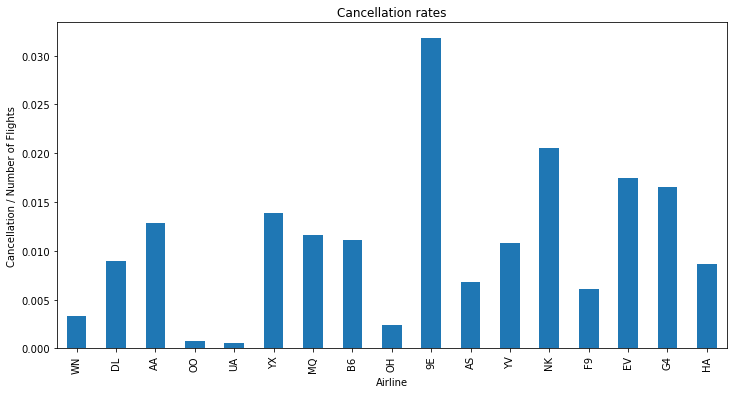

In [30]:
cancellation_rates = flights.groupby('OP_UNIQUE_CARRIER')['CANCELLED'].mean()
cancellation_rates.index = carriers_order
cancellation_rates.plot(kind='bar');
axes_labels('Cancellation rates', 'Airline', 'Cancellation / Number of Flights');
axes_size(12,6);

## Airlines vs Cities

Area of operation for each airline, and its impact the number of flights.

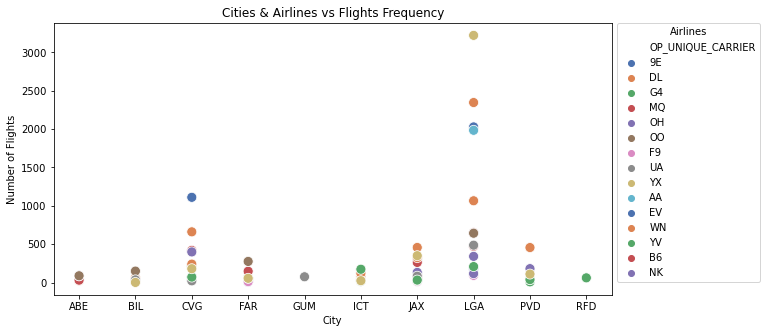

In [31]:
origin_sample = np.random.choice(flights['ORIGIN'].unique(), size=10, replace=False);
flights_sample = flights[flights['ORIGIN'].isin(origin_sample)];
flights_count = flights_sample.groupby(['ORIGIN', 'OP_UNIQUE_CARRIER']).count()['DEST'].to_frame();
flights_count.reset_index(inplace=True);
sns.scatterplot(data=flights_count, x = 'ORIGIN', y = 'DEST', hue ='OP_UNIQUE_CARRIER', palette='deep', s=100);
axes_labels("Cities & Airlines vs Flights Frequency", "City", "Number of Flights");
axes_size(10, 5);
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="Airlines");

Indeed location provides a large statistical and practical significance, we can see that in LGA and ICT cities and YX Airline. YX shows a poor performance in ICT while doing uncanny perfromance in LGA.